In [61]:
import torch # type: ignore
import matplotlib.pyplot as plt # type: ignore
import numpy as np # type: ignore
import matplotlib
import matplotlib.pyplot as plt
import matplotlib as mpl

# Set grid color
mpl.rcParams['axes.grid'] = True
mpl.rcParams['grid.color'] = 'white'

# Set background color
mpl.rcParams['axes.facecolor'] = '#f0f0f0'

# Hide spines
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.bottom'] = False
mpl.rcParams['axes.spines.left'] = False
mpl.rcParams['axes.spines.right'] = False

# Enable LaTeX rendering
mpl.rcParams['text.usetex'] = True

In [73]:
samples_ = np.load("/home/pulkit/sample_7_pt.npy")
# samples = samples_
samples =np.array( [[samples_[j][6], samples_[j][3]+samples_[j][4]+samples_[j][5], samples_[j][0]+samples_[j][1]+samples_[j][2], samples_[j][7]] for j in range(len(samples_))])
samples_2 = np.load("/home/pulkit/samples.npy")
samples= np.concatenate((samples,samples_2),axis=0)
print("Number of samples:", len(samples))

Number of samples: 200000


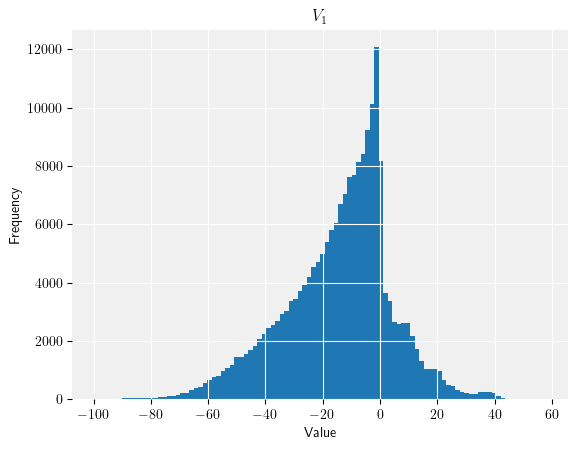

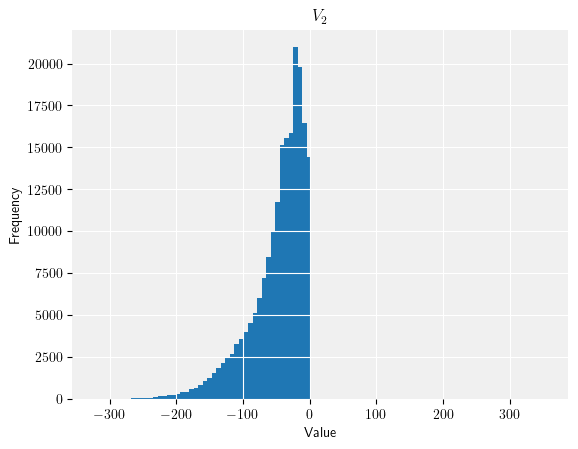

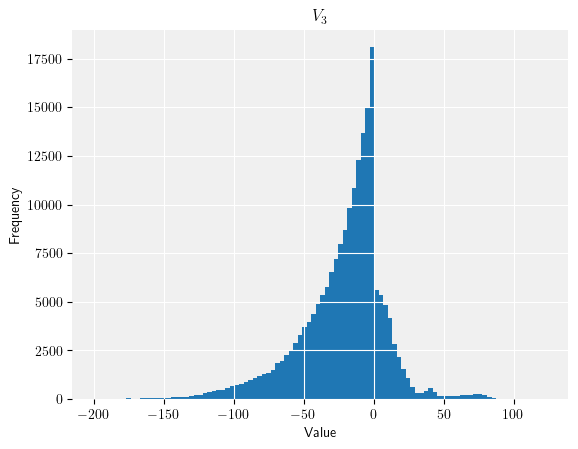

In [67]:
# plot samples[0], samples[1], samples[2] as a markov chain
# plt.plot(range(len(samples)), samples[:,0], '.')
# plt.plot(range(len(samples)), samples[:,1], '')
# plt.plot(range(len(samples)), samples[:,2], '')

# plot histogram of samples[0], samples[1], samples[2]
# show colored grid behind and latex labels

# for v1
plt.hist(samples[:,0], bins=100)
plt.title('$V_1$')
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.savefig("v_1_hist.eps")
plt.show()

# for v2
plt.hist(samples[:,1], bins=100)
plt.title('$V_2$')
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.savefig("v_2_hist.eps")
plt.show()

# for v3
plt.hist(samples[:,2], bins=100)
plt.title('$V_3$')
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.savefig("v_3_hist.eps")
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


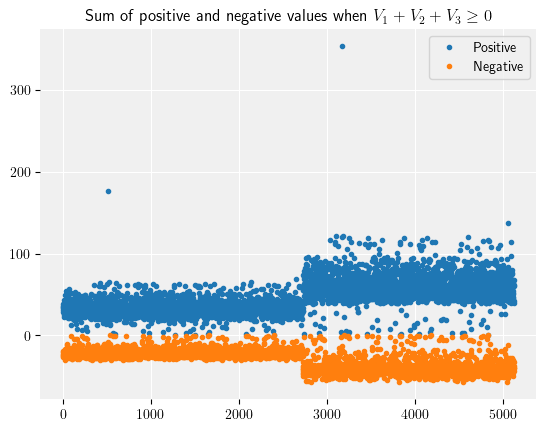

1005.0076623585237
0.999600758677925


In [68]:
# for all samples,
# plot the positive value and the sum of the other two negative values 
# for samples[0:3,:]

# plot the positive value and the sum of the other two negative values
# for samples[0:3,:]
positive = []
negative = []
for i in range(len(samples)):
    p1 = samples[i,0]*(samples[i,0]>=0)
    p2 = samples[i,1]*(samples[i,1]>=0)
    p3 = samples[i,2]*(samples[i,2]>=0)
    n1 = samples[i,0]*(samples[i,0]<0)
    n2 = samples[i,1]*(samples[i,1]<0)
    n3 = samples[i,2]*(samples[i,2]<0)

    if (sum(samples[i][0:3]) >= 0):
        positive.append(p1+p2+p3)
        negative.append(n1+n2+n3)

plt.plot(range(len(positive)), positive, '.')
plt.plot(range(len(positive)), negative, '.')
plt.legend(['Positive', 'Negative'])
plt.title("Sum of positive and negative values when $V_1+V_2+V_3 \geq 0$")
plt.savefig("figures/positive_negative.eps")
plt.show()

any(np.array(negative)>0)
positive = np.array(positive)
negative = np.array(negative)

# print max of samplees[i,j] for all i j
print(np.max(np.abs(positive/negative)))
print(np.max(np.abs(negative/positive)))


In [70]:
samples_neg_Arr = [[samples_[i][j] if samples_[i][j] < 0 else 0 for j in range(len(samples_[0]-1))] for i in range(len(samples_))]
for i in range(len(samples_neg_Arr[0])):
    print(np.count_nonzero(np.array(samples_neg_Arr)[:,i]))

79567
80674
84650
97412
93559
97452
80533
97597
